### COMP 484 Lab 1
Srishan Shakya

Roll No. 46

CE

# Learning NumPy

In [1]:
import numpy
numpy.version.full_version

'1.16.5'

In [2]:
import numpy as np
a = np.array([0, 1, 2, 3, 4, 5])
a

array([0, 1, 2, 3, 4, 5])

In [3]:
a.ndim

1

In [4]:
a.shape

(6,)

In [5]:
b = a.reshape((3, 2))
b

array([[0, 1],
       [2, 3],
       [4, 5]])

In [6]:
b.ndim

2

In [7]:
b.shape

(3, 2)

In [8]:
b[1][0] = 77
b

array([[ 0,  1],
       [77,  3],
       [ 4,  5]])

In [9]:
a

array([ 0,  1, 77,  3,  4,  5])

In [10]:
c = a.reshape((3,2)).copy() #True copy of a is c. So changing c doesn't change a.
c

array([[ 0,  1],
       [77,  3],
       [ 4,  5]])

In [11]:
c[0][0] = -23
a

array([ 0,  1, 77,  3,  4,  5])

In [12]:
c

array([[-23,   1],
       [ 77,   3],
       [  4,   5]])

In [13]:
d = np.array([1, 2, 3, 4, 5]) # * and ** operations in NumPy arrays affect the individual elements
d*2

array([ 2,  4,  6,  8, 10])

In [14]:
d**2

array([ 1,  4,  9, 16, 25], dtype=int32)

In [15]:
[1, 2, 3, 4, 5]*2  # * and ** operations in normal python arrays

[1, 2, 3, 4, 5, 1, 2, 3, 4, 5]

In [16]:
[1, 2, 3, 4, 5]**2 #Normal python doesn't support ** operation on arrays

TypeError: unsupported operand type(s) for ** or pow(): 'list' and 'int'

### Indexing

In [17]:
a

array([ 0,  1, 77,  3,  4,  5])

In [18]:
a[np.array([2, 3, 4])]

array([77,  3,  4])

In [19]:
a>4

array([False, False,  True, False, False,  True])

In [20]:
a[a>4] = 5
a

array([0, 1, 5, 3, 4, 5])

In [21]:
a[a>4]

array([5, 5])

In [22]:
a.clip(1,4)

array([1, 1, 4, 3, 4, 4])

### Handling nonexisting values

In [23]:
c = np.array([1, 2,  np.NAN, 3, 4])
c

array([ 1.,  2., nan,  3.,  4.])

In [24]:
np.isnan(c)

array([False, False,  True, False, False])

In [25]:
c[~np.isnan(c)]

array([1., 2., 3., 4.])

In [26]:
np.mean(c[~np.isnan(c)])

2.5

### Comparing the runtine

In [27]:
import timeit
normal_py = timeit.timeit('sum(x*x for x in range(1000))', number = 10000)
naive_np = timeit.timeit('sum(na*na)', setup = "import numpy as np; na = np.arange(1000)", number = 10000)
good_np = timeit.timeit('na.dot(na)', setup = "import numpy as np; na = np.arange(1000)", number = 10000)

#Interesting Observation: Naive NumPy is slightly faster than normal python as opposed to what the book said
print("Normal Python: %f seconds" % normal_py)
print("Naive NumPy: %f seconds" % naive_np) 
print("Good NumPy: %f seconds" % good_np)

Normal Python: 0.969400 seconds
Naive NumPy: 0.949046 seconds
Good NumPy: 0.015261 seconds


In [28]:
#NumPy array only store values of single data type
a = np.array([1, 2, 3])
a.dtype

dtype('int32')

In [29]:
np.array([1, "String"])

array(['1', 'String'], dtype='<U11')

In [30]:
np.array([1, "String", set([1, 2, 3])])

array([1, 'String', {1, 2, 3}], dtype=object)

# Learning SciPy

In [31]:
import scipy, numpy
scipy.version.full_version

'1.3.1'

In [32]:
scipy.dot is numpy.dot

True

Complete namespace of NumPy is accessible via SciPy. 
It has different packages with different algorithms. 
stats, interpolate, cluster and signal are packages of most interest for now.

# First application of Machine Learning (MLaaS)

A  hypothetical web start-up, MLaaS, which sells the service of providing machine learning algorithms via HTTP. With increasing success of our company, the demand for better infrastructure increases to serve all incoming web requests successfully.
*The question is* when will we hit the limit of our current infrastructure, which we estimated to be at 100,000 requests per hour.

## Reading in the data

The file *web_traffic.tsv* has web stats for the last month. Each line contains the hour consecutively and the number of web hits in that hour.

In [33]:
import scipy as sp
data = sp.genfromtxt("web_traffic.tsv", delimiter = "\t")
print(data[:10])

[[1.000e+00 2.272e+03]
 [2.000e+00       nan]
 [3.000e+00 1.386e+03]
 [4.000e+00 1.365e+03]
 [5.000e+00 1.488e+03]
 [6.000e+00 1.337e+03]
 [7.000e+00 1.883e+03]
 [8.000e+00 2.283e+03]
 [9.000e+00 1.335e+03]
 [1.000e+01 1.025e+03]]


In [34]:
print(data.shape)

(743, 2)


## Preprocessing and cleaning the data

In [35]:
#Separating data into two vectors
x = data[:, 0]
y = data[:, 1]

In [36]:
sp.sum(sp.isnan(y))

8

In [37]:
# Removing invalid values
x = x[~sp.isnan(y)]
y = y[~sp.isnan(y)]

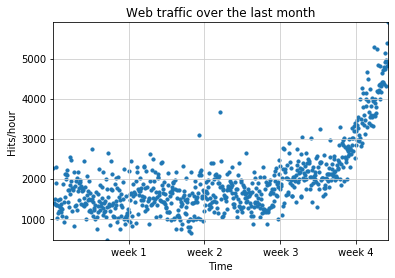

In [38]:
# The line below is to show the scatter plot in the notebook
%matplotlib inline

#scatter plot of the web_trafiic data
import matplotlib.pyplot as plt
# plot (x, y) points with size 10
plt.scatter(x, y, s = 10)
plt.title("Web traffic over the last month")
plt.xlabel("Time")
plt.ylabel("Hits/hour")
plt.xticks([w*7*24 for w in range(10)], ['week %i' % w for w in range(10)])
plt.autoscale(tight = True)
# Draw a slightly opaque dashed grid
plt.grid(True, linestyle = '-', color = '0.8')
#plt.show()

# Choosing the right model and learning algorithm

In [39]:
#Function to calculate eror of a learned model fucntion 'f'.
#Approximation Error is calculated as squared distance of the model's prediction to the real data.

def error(f, x, y):
    return sp.sum((f(x)-y)**2)

## Starting with a straight line

In [40]:
fp1, residuals, rank, sv, rcond = sp.polyfit(x, y, 1, full = True) #full = True gives the additional parameters. without it polyfit only gives model parameters
# polyfit() function of SciPy with the order 1 models the data as straight line.

print("Model parameters: %s" %fp1) #Model parameters are a and b means line y = a*x + b is the best fit
print(residuals) #Residuals is same as approximation error

Model parameters: [  2.59619213 989.02487106]
[3.17389767e+08]


In [41]:
# Use poly1d() to create a model function based on polyfit results
f1 = sp.poly1d(fp1)
print(error(f1, x, y))

317389767.339778


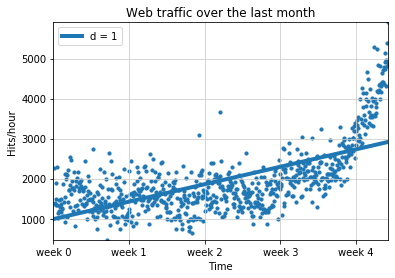

In [42]:
%matplotlib inline

import matplotlib.pyplot as plt
# original web_traffic data plot
plt.scatter(x, y, s = 10)
plt.title("Web traffic over the last month")
plt.xlabel("Time")
plt.ylabel("Hits/hour")
plt.xticks([w*7*24 for w in range(10)], ['week %i' % w for w in range(10)])
plt.autoscale(tight = True)
plt.grid(True, linestyle = '-', color = '0.8')

# Straight line model plot
fx = sp.linspace(0, x[-1], 1000) #generate X-values for plotting
plt.plot(fx, f1(fx), linewidth = 4)
plt.legend(["d = %i" % f1.order], loc = "upper left")

## Some Advanced Stuffs

In [43]:
f2p = sp.polyfit(x, y, 2)
print(f2p)
f2 = sp.poly1d(f2p)
print(error(f2, x, y))

[ 1.05322215e-02 -5.26545650e+00  1.97476082e+03]
179983507.8781792


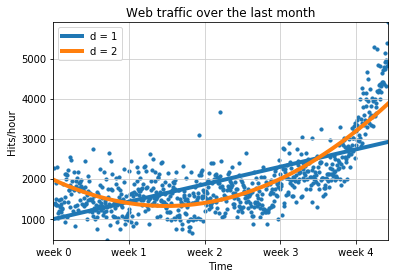

In [44]:
%matplotlib inline

import matplotlib.pyplot as plt
# original web_traffic data plot
plt.scatter(x, y, s = 10)
plt.title("Web traffic over the last month")
plt.xlabel("Time")
plt.ylabel("Hits/hour")
plt.xticks([w*7*24 for w in range(10)], ['week %i' % w for w in range(10)])
plt.autoscale(tight = True)
plt.grid(True, linestyle = '-', color = '0.8')


fx = sp.linspace(0, x[-1], 1000) #generate X-values for plotting
# Straight line model plot
plt.plot(fx, f1(fx), linewidth = 4)

# order = 2 model plot
plt.plot(fx, f2(fx), linewidth = 4)


plt.legend(["d = %i" % f1.order, "d = %i" % f2.order], loc = "upper left")

In [45]:
f3p = sp.polyfit(x, y, 3)
print(f3p)
f3 = sp.poly1d(f3p)
print(error(f3, x, y))

f10p = sp.polyfit(x, y, 10)
print(f10p)
f10 = sp.poly1d(f10p)
print(error(f10, x, y))

f100p = sp.polyfit(x, y, 100)
print(f100p)
f100 = sp.poly1d(f100p)
print (error(f100, x, y))

[ 3.04960132e-05 -2.35893797e-02  4.94226019e+00  1.33328797e+03]
139350144.03172523
[-3.73981969e-22  1.36473757e-18 -2.14294407e-15  1.89884971e-12
 -1.04570108e-09  3.70867731e-07 -8.45604589e-05  1.19167041e-02
 -9.41618607e-01  3.33703840e+01  1.26421204e+03]
121942326.36347426
[ 0.00000000e+000 -0.00000000e+000  0.00000000e+000  0.00000000e+000
 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000  0.00000000e+000
  0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000
 -0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
  0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000 -0.00000000e+000
  0.00000000e+000 -0.00000000e+000  0.00000000e+000  0.00000000e+000
  0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
  0.00000000e+000  0.00000000e+000  0.00000000e+000  0.00000000e+000
  0.00000000e+000  0.00000

C:\ProgramData\Anaconda3\lib\site-packages\numpy\lib\polynomial.py:626: RuntimeWarning: overflow encountered in multiply
  scale = NX.sqrt((lhs*lhs).sum(axis=0))
C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\_methods.py:36: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial)
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RankWarning: Polyfit may be poorly conditioned
  # This is added back by InteractiveShellApp.init_path()


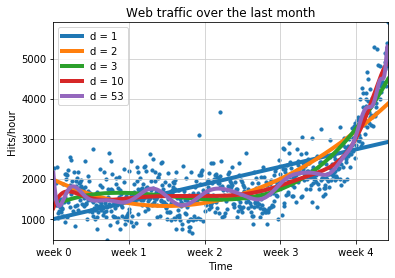

In [46]:
%matplotlib inline

import matplotlib.pyplot as plt
# original web_traffic data plot
plt.scatter(x, y, s = 10)
plt.title("Web traffic over the last month")
plt.xlabel("Time")
plt.ylabel("Hits/hour")
plt.xticks([w*7*24 for w in range(10)], ['week %i' % w for w in range(10)])
plt.autoscale(tight = True)
plt.grid(True, linestyle = '-', color = '0.8')


fx = sp.linspace(0, x[-1], 1000) #generate X-values for plotting
# Straight line model plot
plt.plot(fx, f1(fx), linewidth = 4)

# order = 2 model plot
plt.plot(fx, f2(fx), linewidth = 4)
# order = 3 model plot
plt.plot(fx, f3(fx), linewidth = 4)
# order = 10 model plot
plt.plot(fx, f10(fx), linewidth = 4)
# order = 100 model plot
plt.plot(fx, f100(fx), linewidth = 4)


plt.legend(["d = %i" % f1.order, "d = %i" % f2.order, "d = %i" % f3.order, "d = %i" % f10.order, "d = %i" % f100.order], loc = "upper left")

Even though increasing the complexity or the order of fitting results in lower error rates, we also see more noise get added in our model. This is called ***overfitting***.

At this point, we have the following choices: 
- Choosing one of the fitted polynomial models. 
- Switching to another more complex model class. Splines? 
- Thinking differently about the data and start again.

### Stepping back to go forward - another look at our data

In [47]:
# There is a inflection point between week 3 and 4 in our data. 
# Separate the data and train two lines with week 3.5 as separation point
inflection = 3.5*7*24
inflection = int(inflection)
xa = x[:inflection] # data before inflection point
ya = y[:inflection]
xb = x[inflection:] # data after inflection point
yb = y[inflection:]

# polyfit with order = 1 i.e. straight line model on two separated data
fa = sp.poly1d(sp.polyfit(xa, ya, 1))
fb = sp.poly1d(sp.polyfit(xb, yb, 1))
fa_error = error(fa, xa, ya)
fb_error = error(fb, xb, yb)
print("Error inflection = %f" % (fa_error + fb_error))


Error inflection = 132950348.197616


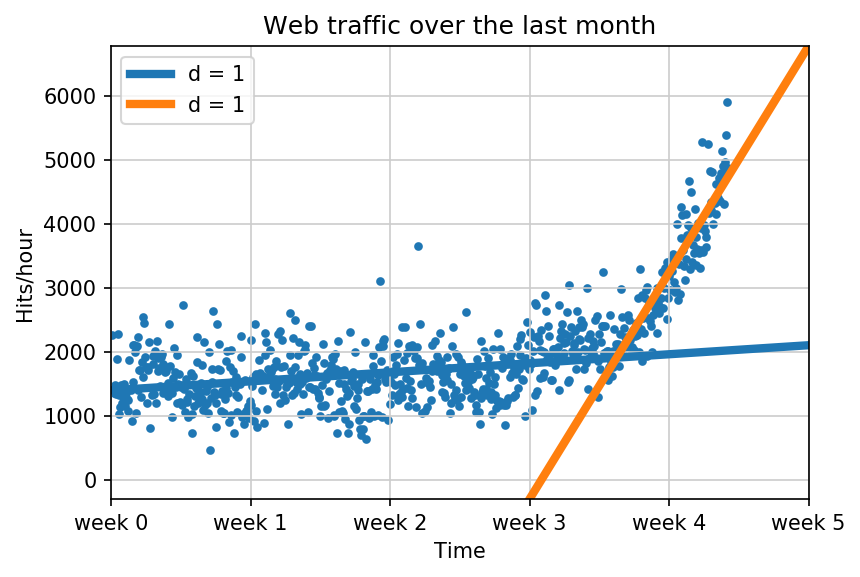

In [48]:
%matplotlib inline

import matplotlib.pyplot as plt

plt.rcParams['figure.dpi'] = 150
# original web_traffic data plot
plt.scatter(x, y, s = 10)
plt.title("Web traffic over the last month")
plt.xlabel("Time")
plt.ylabel("Hits/hour")
plt.xticks([w*7*24 for w in range(10)], ['week %i' % w for w in range(10)])
plt.autoscale(tight = True)
plt.grid(True, linestyle = '-', color = '0.8')


fxa = sp.linspace(0, 5*7*24, 1200) #generate X-values for plotting
fxb = sp.linspace(3*7*24, 5*7*24, 1000)
# plot of straight line model trained before 3.5 weeks or inflection point
plt.plot(fxa, fa(fxa), linewidth = 4)

# plot of straight line model trained after 3.5 weeks or inflection point
plt.plot(fxb, fb(fxb), linewidth = 4)


plt.legend(["d = %i" % fa.order, "d = %i" % fb.order], loc = "upper left")

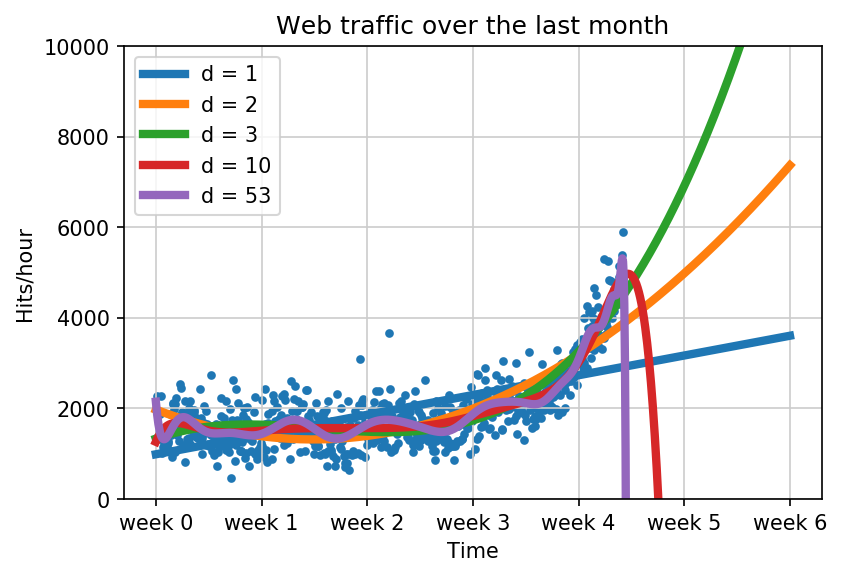

In [49]:
%matplotlib inline

# Predicting values into the future using previous models
import matplotlib.pyplot as plt
# original web_traffic data plot
plt.rcParams['figure.dpi'] = 150
plt.scatter(x, y, s = 10)
plt.title("Web traffic over the last month")
plt.xlabel("Time")
plt.ylabel("Hits/hour")
plt.xticks([w*7*24 for w in range(10)], ['week %i' % w for w in range(10)])
plt.autoscale(tight = False)
plt.grid(True, linestyle = '-', color = '0.8')
plt.ylim(bottom = 0)
plt.ylim(top = 10000)


fx = sp.linspace(0, 6*7*24, 1000) #generate X-values for plotting. Here 6*7*24 is used to generate values to 6 weeks
# Straight line model plot
plt.plot(fx, f1(fx), linewidth = 4)

# order = 2 model plot
plt.plot(fx, f2(fx), linewidth = 4)
# order = 3 model plot
plt.plot(fx, f3(fx), linewidth = 4)
# order = 10 model plot
plt.plot(fx, f10(fx), linewidth = 4)
# order = 100 model plot
plt.plot(fx, f100(fx), linewidth = 4)


plt.legend(["d = %i" % f1.order, "d = %i" % f2.order, "d = %i" % f3.order, "d = %i" % f10.order, "d = %i" % f100.order], loc = "upper left")

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:19: RankWarning: Polyfit may be poorly conditioned
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:20: RankWarning: Polyfit may be poorly conditioned


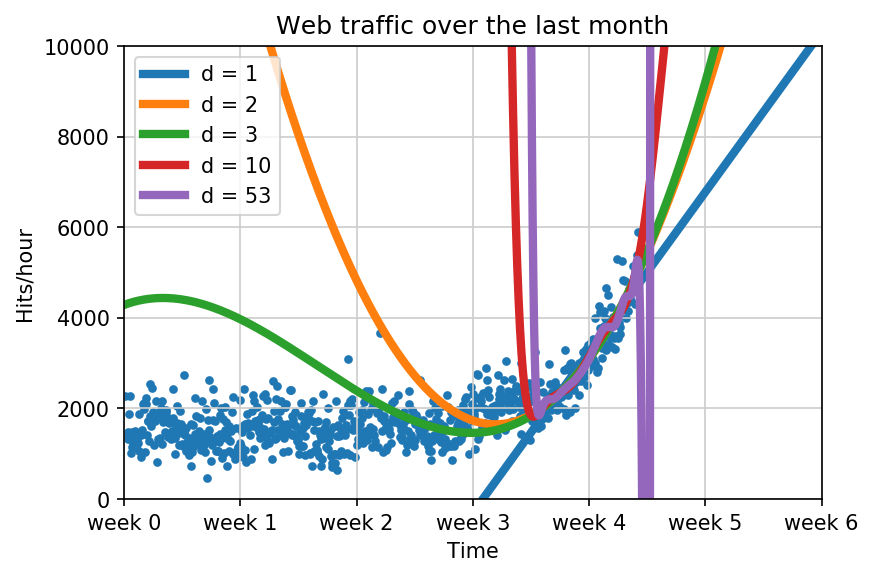

In [50]:
%matplotlib inline

import matplotlib.pyplot as plt
# original web_traffic data plot
plt.rcParams['figure.dpi'] = 150
plt.scatter(x, y, s = 10)
plt.title("Web traffic over the last month")
plt.xlabel("Time")
plt.ylabel("Hits/hour")
plt.xticks([w*7*24 for w in range(10)], ['week %i' % w for w in range(10)])
plt.autoscale(tight = True)
plt.grid(True, linestyle = '-', color = '0.8')
plt.ylim(bottom = 0)
plt.ylim(top = 10000)

#Fitting data from week 3.5 and later only to models of degree 2 and above
fb2 = sp.poly1d(sp.polyfit(xb, yb, 2))
fb3 = sp.poly1d(sp.polyfit(xb, yb, 3))
fb10 = sp.poly1d(sp.polyfit(xb, yb, 10))
fb100 = sp.poly1d(sp.polyfit(xb, yb, 100))

fx = sp.linspace(0, 6*7*24, 1000) #predicting to 6 weeks

# Straight line model plot
plt.plot(fx, fb(fx), linewidth = 4)
# order = 2 model plot
plt.plot(fx, fb2(fx), linewidth = 4)
# order = 3 model plot
plt.plot(fx, fb3(fx), linewidth = 4)
# order = 10 model plot
plt.plot(fx, fb10(fx), linewidth = 4)
# order = 100 model plot
plt.plot(fx, fb100(fx), linewidth = 4)


plt.legend(["d = %i" % fb.order, "d = %i" % fb2.order, "d = %i" % fb3.order, "d = %i" % fb10.order, "d = %i" % fb100.order], loc = "upper left")

In [51]:
#Errors on model trained only for the last week or after the inflection point
fb_error = error(fb, xb, yb)
print("Error inflection with degree = 1 is %f" % (fb_error))
fb2_error = error(fb2, xb, yb)
print("Error inflection with degree = 2 is %f" % (fb2_error))
fb3_error = error(fb3, xb, yb)
print("Error inflection with degree = 3 is %f" % (fb3_error))
fb10_error = error(fb10, xb, yb)
print("Error inflection with degree = 10 is %f" % (fb10_error))
fb100_error = error(fb, xb, yb)
print("Error inflection with degree = 100 is %f" % (fb100_error))

Error inflection with degree = 1 is 22143941.107618
Error inflection with degree = 2 is 19768846.989176
Error inflection with degree = 3 is 19766452.361027
Error inflection with degree = 10 is 18949296.465861
Error inflection with degree = 100 is 22143941.107618


## Training and Testing

In [52]:
# Code snippet from https://github.com/luispedro/BuildingMachineLearningSystemsWithPython

frac = 0.3  # 30% of the sorted data is hidden to test different models while remaining 70% is used to train the models 
split_idx = int(frac * len(xb))
shuffled = sp.random.permutation(list(range(len(xb))))

test = sorted(shuffled[:split_idx])
train = sorted(shuffled[split_idx:])

# Training different models with 70% train data
fbt1 = sp.poly1d(sp.polyfit(xb[train], yb[train], 1))
fbt2 = sp.poly1d(sp.polyfit(xb[train], yb[train], 2))
fbt3 = sp.poly1d(sp.polyfit(xb[train], yb[train], 3))
fbt10 = sp.poly1d(sp.polyfit(xb[train], yb[train], 10))
fbt100 = sp.poly1d(sp.polyfit(xb[train], yb[train], 100))

print("Test errors for only the time after inflection point")

# Testing the different models with test data
for f in [fbt1, fbt2, fbt3, fbt10, fbt100]:
    print("Error d=%i: %f" % (f.order, error(f, xb[test], yb[test])))

Test errors for only the time after inflection point
Error d=1: 7735551.631311
Error d=2: 6472809.726527
Error d=3: 6473016.460173
Error d=10: 7233631.448188
Error d=53: 20759147.711670


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:14: RankWarning: Polyfit may be poorly conditioned
  
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:15: RankWarning: Polyfit may be poorly conditioned
  from ipykernel import kernelapp as app


*Model with d=2 has the lowest error when measured using the test data that the model did not see*

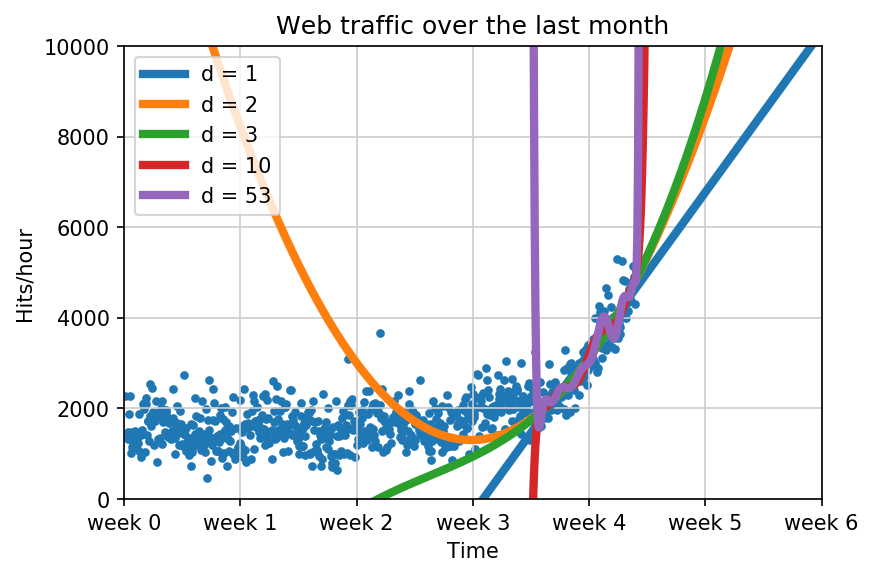

In [53]:
%matplotlib inline

import matplotlib.pyplot as plt
# original web_traffic data plot
plt.rcParams['figure.dpi'] = 150
plt.scatter(x, y, s = 10)
plt.title("Web traffic over the last month")
plt.xlabel("Time")
plt.ylabel("Hits/hour")
plt.xticks([w*7*24 for w in range(10)], ['week %i' % w for w in range(10)])
plt.autoscale(tight = True)
plt.grid(True, linestyle = '-', color = '0.8')
plt.ylim(bottom = 0)
plt.ylim(top = 10000)

fx = sp.linspace(0, 6*7*24, 1000) #predicting to 6 weeks

# Plots of different models fitted with only the fraction of training data after inflection point.
# Straight line model plot
plt.plot(fx, fbt1(fx), linewidth = 4)
# order = 2 model plot
plt.plot(fx, fbt2(fx), linewidth = 4)
# order = 3 model plot
plt.plot(fx, fbt3(fx), linewidth = 4)
# order = 10 model plot
plt.plot(fx, fbt10(fx), linewidth = 4)
# order = 100 model plot
plt.plot(fx, fbt100(fx), linewidth = 4)

plt.legend(["d = %i" % fbt1.order, "d = %i" % fbt2.order, "d = %i" % fbt3.order, "d = %i" % fbt10.order, "d = %i" % fbt100.order], loc = "upper left")

## Answering our initial question
When will we reach 100,000 hits per hour?

In [54]:
# Since fbt2 had the lowest error
print("fbt2(x) = \n%s" % fbt2)
# Since 100,000 is our target hits/hour
print("fbt2(x) - 100,000 = \n%s" % (fbt2 - 100000))

fbt2(x) = 
         2
0.06227 x - 62.42 x + 1.695e+04
fbt2(x) - 100,000 = 
         2
0.06227 x - 62.42 x - 8.305e+04


In [55]:
from scipy.optimize import fsolve

reached_max = fsolve(fbt2-100000, x0=800)/(7*24) 
# fsolve finds the root of equation fbt2 - 100,000, which is our answer in hours
# divide it by (7*24) to get the expected time required to reach 100,000 hits/hour in weeks

print("100,000 hits/hour expected at week %f" % reached_max[0])

100,000 hits/hour expected at week 10.477649
